In [ ]:
!pip install numpy pandas scikit-learn matplotlib seaborn kaggle


In [ ]:
from google.colab import files
files.upload()


Saving Test_data.csv to Test_data (2).csv
Saving Train_data.csv to Train_data (2).csv


{'Test_data (2).csv': b'duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate\r\n0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0,0,1,1,0.04,0.06,0,255,10,0.04,0.06,0,0,0,0,1,1\r\n0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0,0,1,1,0.01,0.06,0,255,1,0,0.06,0,0,0,0,1,1\r\n2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,134,86,0.61,0.04,0.61,0.02,0,0,0,0\r\n0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [ ]:
train_df = pd.read_csv("Train_data.csv")
test_df = pd.read_csv("Test_data.csv")

train_df.head()


duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate    class  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  anomaly  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [ ]:
df = pd.concat([train_df, test_df]).reset_index(drop=True)
df.head()


duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate    class  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  anomaly  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols


Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

In [ ]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop("class", axis=1)
y = df["class"]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [ ]:
svm_clf = SVC(kernel="rbf")
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)


In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [ ]:
def evaluate_model(y_test, pred):
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred, average='macro'))
    print("Recall:", recall_score(y_test, pred, average='macro'))
    print("F1 Score:", f1_score(y_test, pred, average='macro'))


In [ ]:
print("=== Random Forest ===")
evaluate_model(y_test, rf_pred)


=== Random Forest ===
Accuracy: 0.8078131545873481
Precision: 0.8130220464209756
Recall: 0.818893554431872
F1 Score: 0.815677835106802


In [ ]:
print("=== SVM ===")
evaluate_model(y_test, svm_pred)


=== SVM ===
Accuracy: 0.7134478424801005
Precision: 0.7226531273299944
Recall: 0.7266060412265573
F1 Score: 0.7235683085026859


In [ ]:
print("=== Logistic Regression ===")
evaluate_model(y_test, lr_pred)


=== Logistic Regression ===
Accuracy: 0.6389819857561793
Precision: 0.649716621590804
Recall: 0.6404700810770146
F1 Score: 0.6448048953649225


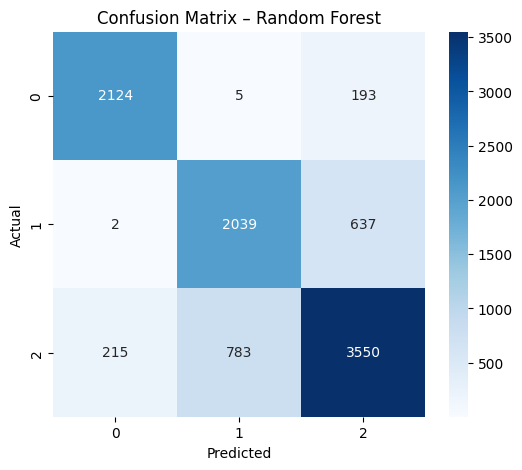

In [ ]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pickle
pickle.dump(rf, open("cybersecurity_rf_model.pkl", "wb"))


In [ ]:
from google.colab import files
files.download("cybersecurity_rf_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cybersecurity_rf_model.pkl to cybersecurity_rf_model (1).pkl


In [ ]:
import joblib

# Replace the name with your uploaded file
model = joblib.load("cybersecurity_rf_model.pkl")

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import numpy as np

# Example: create a random sample with the correct number of features
# Change 10 to the number of features your dataset had
sample = np.random.rand(1, 41)

prediction = model.predict(sample)
prediction

array([2])

In [ ]:
import numpy as np
import time

def simulate_network_input(num_features=10):
    """
    Simulates incoming network traffic data.
    Generates random numbers as example features.
    """
    return np.random.rand(1, num_features)


def real_time_prediction(model, num_features=10):
    """
    Uses the trained ML model to make predictions in real time.
    """
    print("🔍 Starting Real-Time Intrusion Detection...\n")

    for i in range(10):  # run 10 real-time predictions
        sample = simulate_network_input(num_features)

        prediction = model.predict(sample)[0]

        if prediction == 1:
            print(f"⛔ Attack detected at time {i+1}!")
        else:
            print(f"✔ Normal traffic at time {i+1}")

        time.sleep(1)  # wait 1 second (real-time effect)


In [ ]:
real_time_prediction(model, num_features=41)

🔍 Starting Real-Time Intrusion Detection...

✔ Normal traffic at time 1
✔ Normal traffic at time 2
✔ Normal traffic at time 3
✔ Normal traffic at time 4
✔ Normal traffic at time 5
✔ Normal traffic at time 6
✔ Normal traffic at time 7
✔ Normal traffic at time 8
✔ Normal traffic at time 9
⛔ Attack detected at time 10!
